In [1]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Analizując wartości minimalne oraz maksymalne można stwierdzić, że niektóre są błędne. - trzebaby tutaj wrzucić jakieś przypisy mądre

- Glukoza, Ciśnienie krwi, skinThickness, poziom insuliny, BMI - minimalna wartość nie może wynosić 0

In [4]:
#takie przypisanie żeby nazwa zmiennej się potem zgadzała
data_nozeros = data

#Uncomment to remove rows having zeros
#data_nozeros = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]
#data_nozeros.describe()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set(style='ticks')
plt.figure(figsize=(20,20))
sns.pairplot(data_nozeros, hue='Outcome')

C:\Users\micha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\micha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\micha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\micha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


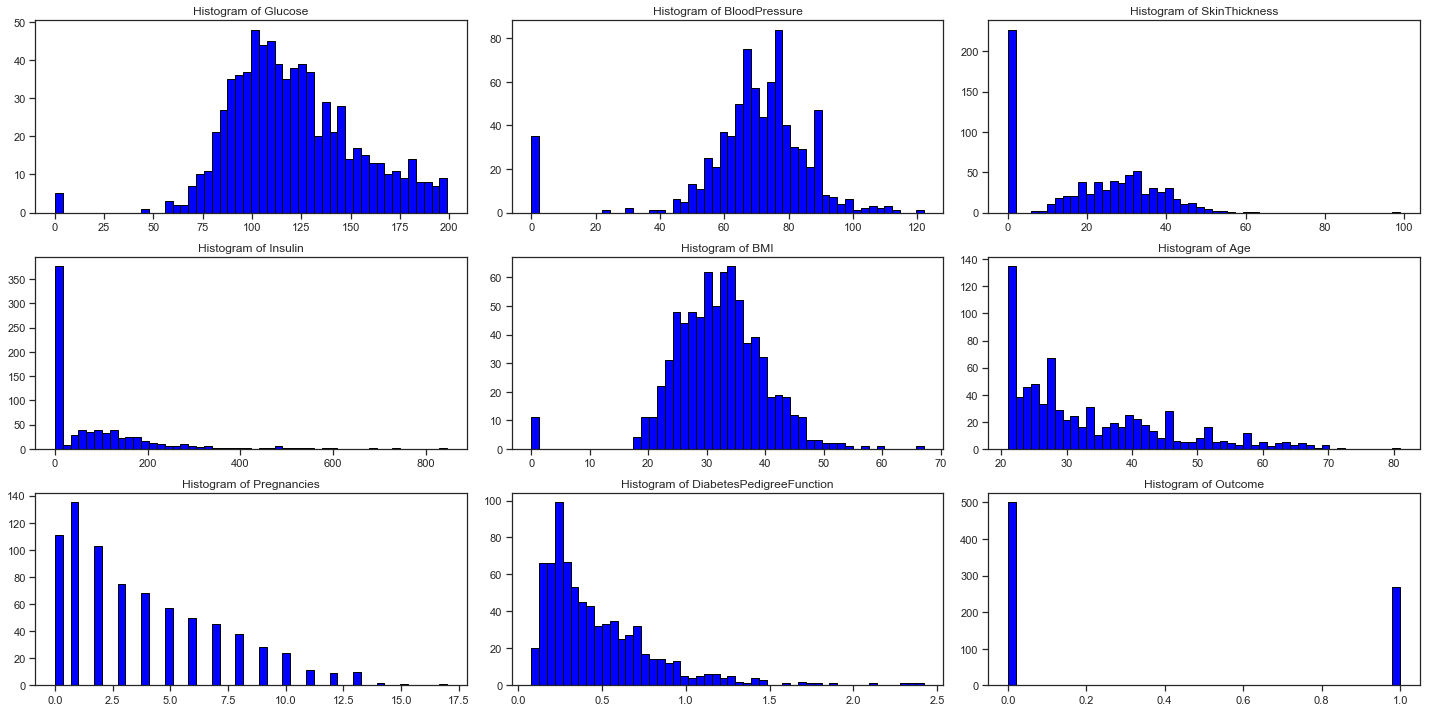

In [6]:
col_names = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Outcome']

plt.rcParams['figure.figsize'] = [20, 10]

for col in col_names:
    # Set up the plot
    ax = plt.subplot(3, 3, col_names.index(col) + 1)    

    # Draw the plot
    ax.hist(data_nozeros[col], color = 'blue', edgecolor = 'black', bins = 50)
    
    # Title and labels
    ax.set_title('Histogram of ' + col)

plt.tight_layout()
plt.show()

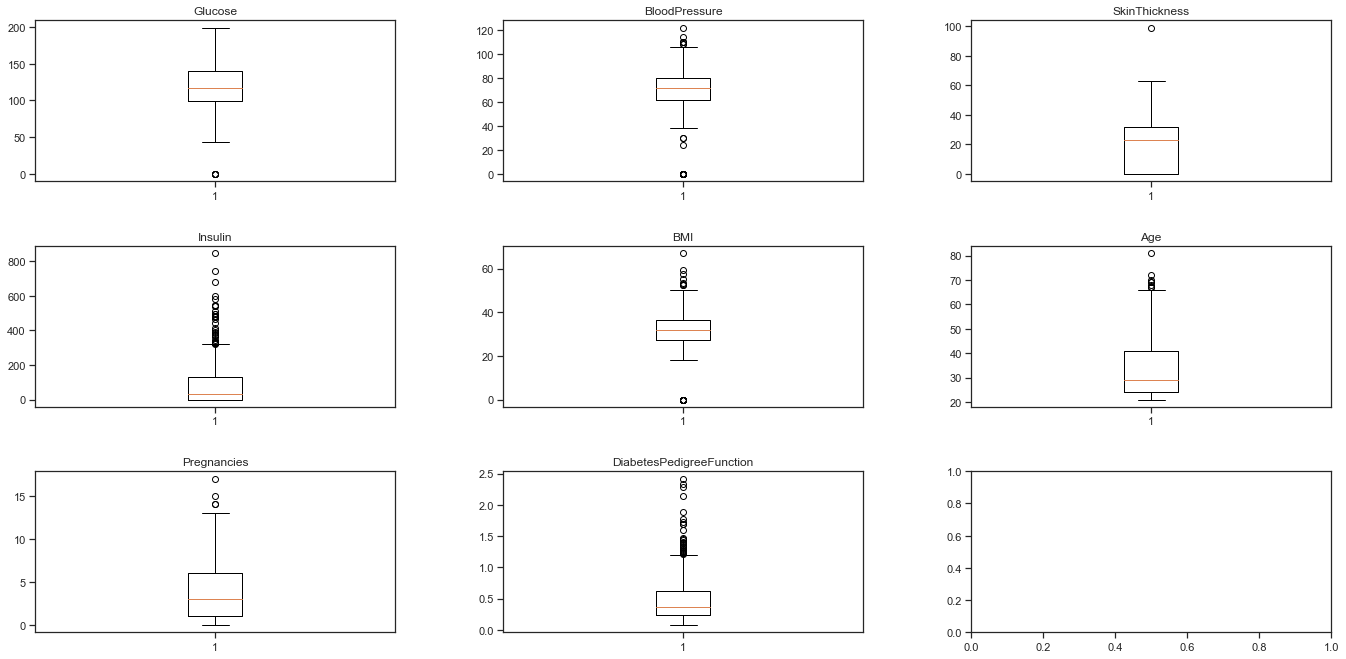

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

fig, axs = plt.subplots(3, 3)

for column in range(0, len(col_names)):
    if (col_names[column] == 'Outcome'):
        continue
        
    row = int(column / 3)
    col = column % 3
    axs[row, col].boxplot(data_nozeros[col_names[column]])
    axs[row, col].set_title(col_names[column])

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()

In [8]:
Q1 = data_nozeros.quantile(0.25)
Q3 = data_nozeros.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [18]:
data_out = data_nozeros[~((data_nozeros < (Q1 - 1.5 * IQR)) | (data_nozeros > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(639, 9)

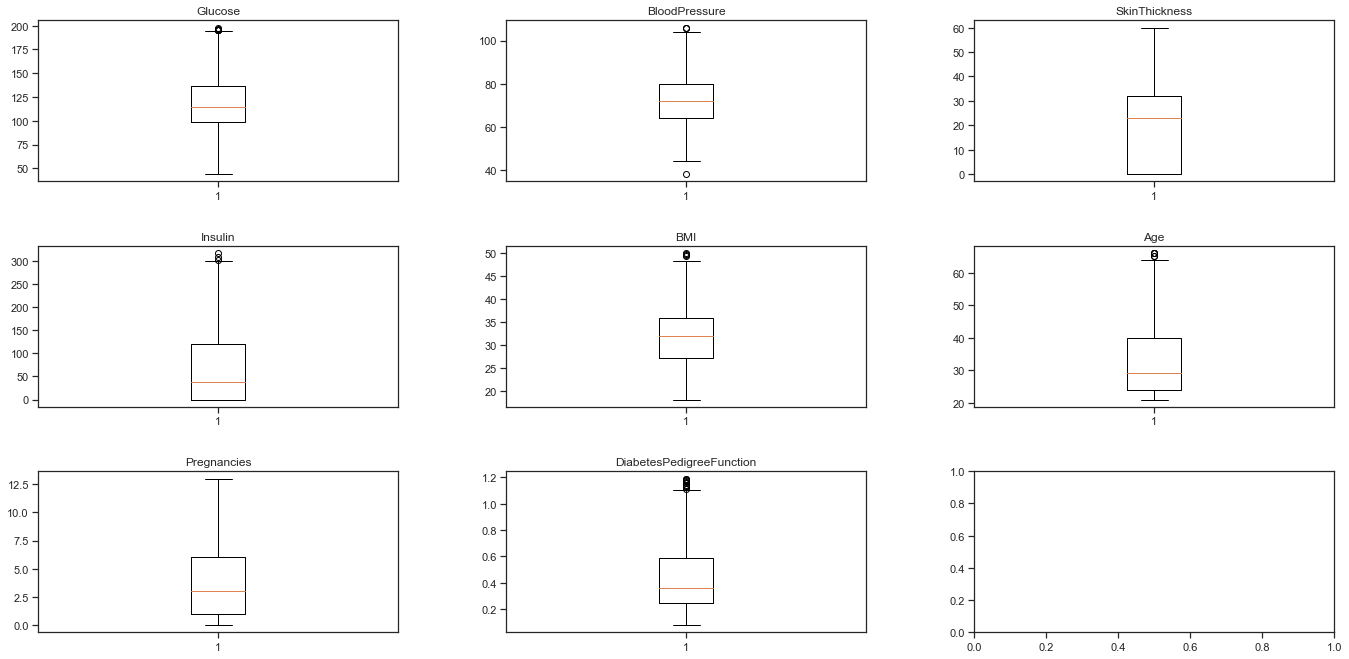

In [19]:
fig, axs = plt.subplots(3, 3)

for column in range(0, len(col_names)):
    if (col_names[column] == 'Outcome'):
        continue
        
    row = int(column / 3)
    col = column % 3
    axs[row, col].boxplot(data_out[col_names[column]])
    axs[row, col].set_title(col_names[column])

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()

In [20]:
data_out.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


In [21]:
data_out.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [22]:
data_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 639 non-null int64
Glucose                     639 non-null int64
BloodPressure               639 non-null int64
SkinThickness               639 non-null int64
Insulin                     639 non-null int64
BMI                         639 non-null float64
DiabetesPedigreeFunction    639 non-null float64
Age                         639 non-null int64
Outcome                     639 non-null int64
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


In [23]:
data_out.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


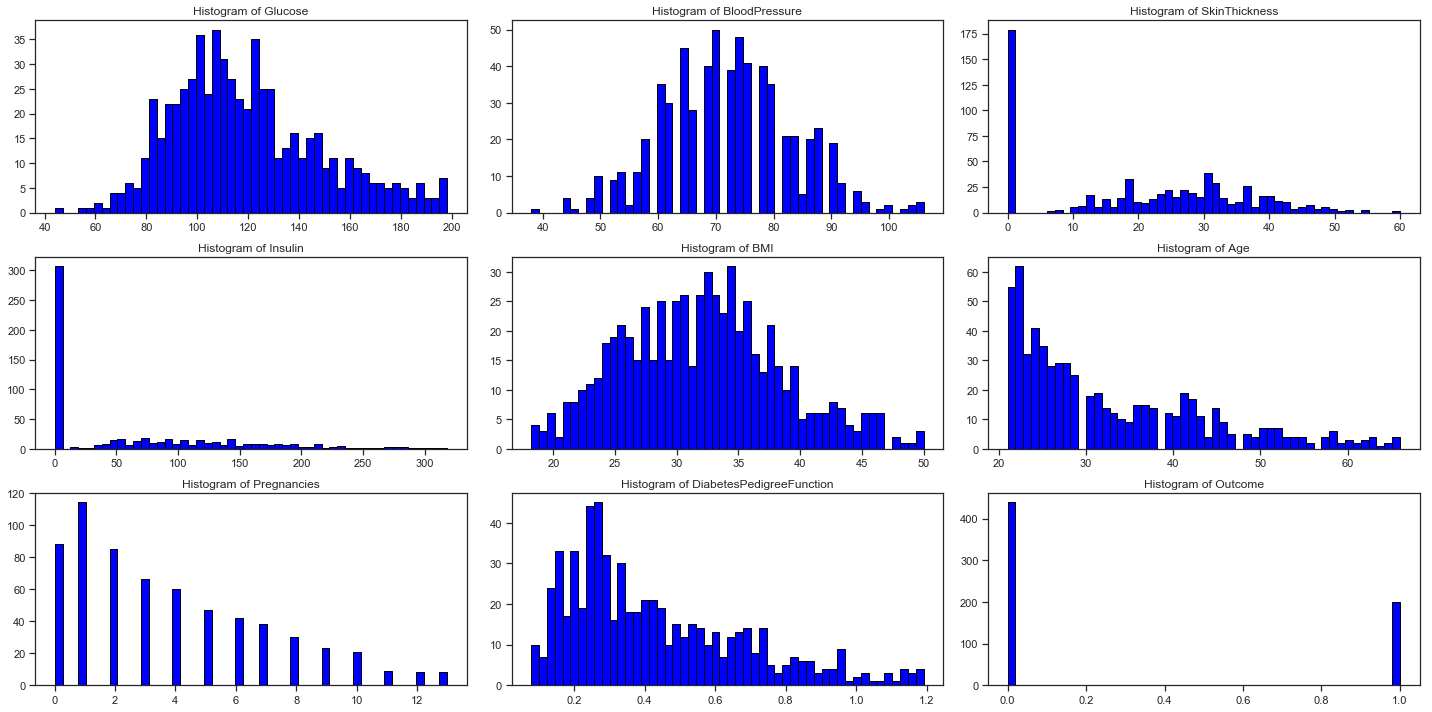

In [24]:
col_names = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Outcome']

plt.rcParams['figure.figsize'] = [20, 10]

for col in col_names:
    # Set up the plot
    ax = plt.subplot(3, 3, col_names.index(col) + 1)    

    # Draw the plot
    ax.hist(data_out[col], color = 'blue', edgecolor = 'black', bins = 50)
    
    # Title and labels
    ax.set_title('Histogram of ' + col)

plt.tight_layout()
plt.show()

In [25]:
col_names = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col_name in col_names:
    average = round(data_out[col_name].mean(skipna=True), 1 if col_name == 'BMI' else 0)
    data_out[col_name] = data_out[col_name].replace(0, average)

data_out['DiabetesPedigreeFunction'] = data_out['DiabetesPedigreeFunction'].round(3)

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [ ]:
col_names = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Outcome']

plt.rcParams['figure.figsize'] = [20, 10]

for col in col_names:
    # Set up the plot
    ax = plt.subplot(3, 3, col_names.index(col) + 1)    

    # Draw the plot
    ax.hist(data_out[col], color = 'blue', edgecolor = 'black', bins = 50)
    
    # Title and labels
    ax.set_title('Histogram of ' + col)

plt.tight_layout()
plt.show()